Importing all libaries nessesary

In [3]:
import pandas as pd
import json 
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords



This goes through the JSONL file in a loop with O(n) runtime. Due to length of the file this is inefficant and another way needs to be found.

In [4]:
# Initialize an empty list to store the JSON objects
# data = []


# df = pd.DataFrame()
# df= pd.read_json('ca_test_data_final_OFFICIAL.jsonl')


# # Open the file and read line by line
# with open('ca_test_data_final_OFFICIAL.jsonl', 'r') as file:
#     for line in file:
#         # Parse each line as a JSON object and append to the list
#         data.append(json.loads(line))

# # Convert the list of dictionaries to a DataFrame
# df = pd.DataFrame(data)
# df.head()


Much simpilar verson that does most of the same thing, but does not seperate it the same as the previous verson instead putting it into coloumbs. (This is incorect this does put the data into coloumbs)

In [5]:
df = pd.read_json('ca_test_data_final_OFFICIAL.jsonl', lines=True)

selected_columns = ['summary', 'title', 'sum_len']
dataf_Summaries = df[selected_columns].copy()

selected_columns[1] = 'bill_id'
df = df.drop(columns=selected_columns)


Removes stopwords to clean the nessary data

In [8]:

stop = nltk.download('stopwords')

stop_words = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
# Removing the text between perentheses
pattern = r'\([^)]*\)'
# Replacing the matched text with an empty string
df['text'] = df['text'].str.replace(pattern, '', regex=True)

# Removing the Section headings. Included under is the pattern to remvoe all the section words and the numbers after. 
pattern = r'SECTION \d+\s?'
# Pattern = r'(?i)SECTION \d+\s?'

# Replacing the matched text with an empty string
df['text'] = df['text'].str.replace(pattern, '', regex=True)
textCell = df.iat[3, df.columns.get_loc('text')]
summaryCell = dataf_Summaries.iat[3, dataf_Summaries.columns.get_loc('summary')]

print(textCell)
print("\nSummary")
print(summaryCell)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\olive\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The people State California enact follows: . Section 75220 Public Resources Code amended read: 75220. The Transit Intercity Rail Capital Program hereby created fund transformative capital improvements, defined subdivision , modernize California’s intercity, commuter, urban rail systems bus ferry transit systems achieve following policy objectives: Reduce emissions greenhouse gases. Expand improve transit service increase ridership. Integrate rail service state’s various rail operators, including integration high-speed rail system. Improve transit safety. The Transportation Agency shall evaluate applications consistent criteria set forth part approve multiyear program projects funding pursuant Section 75224, may revised necessary. The California Transportation Commission shall allocate funding applicants pursuant program projects approved Transportation Agency. “Transformative capital improvement” means rail, bus, ferry transit project significantly reduce vehicle miles traveled, conges

Histogram plot of the Sumerization length. Top is with outlires and the bottom is with one outlire removed. 

<Axes: ylabel='Frequency'>

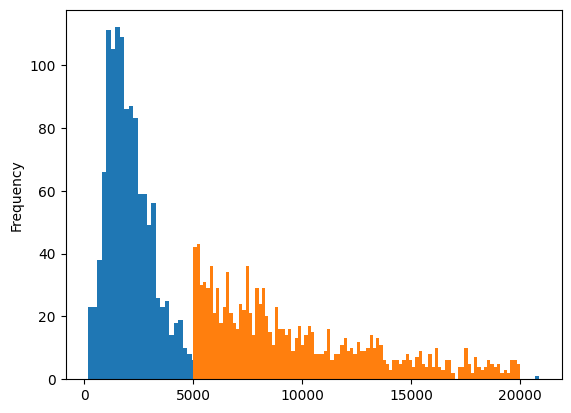

In [7]:
dataf_Summaries["sum_len"].plot(kind = "hist", bins=100)
df["text_len"].plot(kind = "hist", bins=100)

